In [ ]:
!pip install streamlit
!pip install google-generativeai
!pip install faiss-cpu
!pip install sentence-transformers
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 21.1 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import google.generativeai as palm
import faiss
from sentence_transformers import SentenceTransformer

In [ ]:
import google.generativeai as palm

# Set your API key for Google PaLM
API_KEY = "your API_KEY"
palm.configure(api_key=API_KEY)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.24
    Uninstalling langchain-core-0.3.24:
      Successfully uninstalled langchain-core-0.3.24
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.2
    Uninstalling langchain-text-splitters-0.3.2:
      Successfully uninstalled langchain-text-splitters-0.3.2
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.11
    Uninstalling langchain-0.3.11:
      Successfully uninstalled langchain-0.3.11


In [ ]:
# Define the path to the CSV file in your Google Drive
file_path = '/content/drive/MyDrive/ADVAI/codebasics_faqs.csv'

# Load the CSV file using CSVLoader with a specific encoding
from langchain.document_loaders.csv_loader import CSVLoader
loader = CSVLoader(file_path=file_path, source_column='prompt', encoding='ISO-8859-1')  # Use ISO-8859-1 or 'latin1' encoding
data = loader.load()

# Display the loaded data to confirm it's working
print(data)

[Document(metadata={'source': 'I have never done programming in my life. Can I take this bootcamp?', 'row': 0}, page_content='prompt: I have never done programming in my life. Can I take this bootcamp?\nresponse: Yes, this is the perfect bootcamp for anyone who has never done coding and wants to build a career in the IT/Data Analytics industry or just wants to perform better in your current job or business using data.'), Document(metadata={'source': 'Why should I trust Codebasics?', 'row': 1}, page_content='prompt: Why should I trust Codebasics?\nresponse: Till now 9000 + learners have benefitted from the quality of our courses. You can check the review section and also we have attached their LinkedIn profiles so that you can connect with them and ask directly.'), Document(metadata={'source': '', 'row': 2}, page_content='prompt: \nresponse: '), Document(metadata={'source': 'Is there any prerequisite for taking this bootcamp ?', 'row': 3}, page_content='prompt: Is there any prerequisite

In [ ]:
import pandas as pd

# Load the dataset (replace with your file path if needed)
faq_data = pd.read_csv('/content/drive/MyDrive/ADVAI/codebasics_faqs.csv', encoding='ISO-8859-1')

# Ensure columns exist
assert 'prompt' in faq_data.columns and 'response' in faq_data.columns, "Dataset must have 'question' and 'answer' columns."

# Extract questions and answers
questions = faq_data['prompt'].tolist()
answers = faq_data['response'].tolist()

In [ ]:
from sentence_transformers import SentenceTransformer

# Load HuggingFace Instructor Model
embedding_model = SentenceTransformer('hkunlp/instructor-xl',device='cpu')

# Create embeddings for the FAQ questions
question_embeddings = embedding_model.encode(questions, convert_to_tensor=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.40k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/270 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.15M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

In [ ]:
import faiss
import numpy as np

# Initialize FAISS index
embedding_dim = question_embeddings.shape[1]
faiss_index = faiss.IndexFlatL2(embedding_dim)

# Convert to numpy array and add to FAISS index
question_embeddings_np = question_embeddings.detach().cpu().numpy()
faiss_index.add(question_embeddings_np)

In [ ]:
!pip install pyngrok

In [ ]:
app_code = """
import streamlit as st
import google.generativeai as palm
import faiss
from sentence_transformers import SentenceTransformer
import pandas as pd
from datetime import datetime

# Load the dataset
faq_data = pd.read_csv('/content/drive/MyDrive/ADVAI/codebasics_faqs.csv', encoding='ISO-8859-1')

# Ensure columns exist
assert 'prompt' in faq_data.columns and 'response' in faq_data.columns, "Dataset must have 'prompt' and 'response' columns."

# Extract questions and answers
questions = faq_data['prompt'].tolist()
answers = faq_data['response'].tolist()

# Load the embedding model
embedding_model = SentenceTransformer('hkunlp/instructor-xl')

# Create FAISS index
embedding_dim = embedding_model.get_sentence_embedding_dimension()
faiss_index = faiss.IndexFlatL2(embedding_dim)

# Create embeddings for the FAQ prompts
question_embeddings = embedding_model.encode(questions, convert_to_tensor=True)
faiss_index.add(question_embeddings.detach().cpu().numpy())

# Configure Google PaLM
palm.configure(api_key="your-google-palm-api-key")

# Feedback storage (e.g., CSV or a database)
FEEDBACK_FILE = "feedback.csv"

# Function to save feedback
def save_feedback(query, response, feedback):
    feedback_data = {
        "query": query,
        "response": response,
        "feedback": feedback,
        "timestamp": datetime.now().isoformat()
    }
    feedback_df = pd.DataFrame([feedback_data])

    # Append feedback to CSV
    try:
        feedback_df.to_csv(FEEDBACK_FILE, mode='a', header=not open(FEEDBACK_FILE).readlines(), index=False)
    except FileNotFoundError:
        feedback_df.to_csv(FEEDBACK_FILE, index=False)
    st.success("Feedback submitted successfully!")

# Streamlit app UI
st.title("FAQ Assistant with Generative AI")

query = st.text_input("Ask a question:")

if query:
    # Generate embedding for the query
    query_embedding = embedding_model.encode([query], convert_to_tensor=True).detach().cpu().numpy()

    # Search for the closest match in FAISS
    D, I = faiss_index.search(query_embedding, k=1)
    best_match_index = I[0][0]
    similarity_score = D[0][0]

    # Define a similarity threshold
    similarity_threshold = 0.5

    if similarity_score < similarity_threshold:
        # Fetch and display the corresponding response
        answer = answers[best_match_index]
        st.write(f"**Answer:** {answer}")
    else:
        # Display a fallback response if no good match is found
        answer = "I don't know the answer to this question. Please try rephrasing."
        st.write(answer)

    # Feedback buttons
    st.write("Was this response helpful?")
    col1, col2, col3 = st.columns(3)
    with col1:
        if st.button("Good"):
            save_feedback(query, answer, "Good")
    with col2:
        if st.button("Neutral"):
            save_feedback(query, answer, "Neutral")
    with col3:
        if st.button("Bad"):
            save_feedback(query, answer, "Bad")

# Optional: Display feedback data
if st.checkbox("View Feedback"):
    try:
        feedback_df = pd.read_csv(FEEDBACK_FILE)
        st.write(feedback_df)
    except FileNotFoundError:
        st.write("No feedback available yet.")
"""

# Save the updated code to `app.py`
with open("app.py", "w") as file:
    file.write(app_code)

print("Streamlit app saved as `app.py` with feedback functionality.")


Streamlit app saved as `app.py` with feedback functionality.


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import faiss

# Load the dataset
faq_data = pd.read_csv('/content/drive/MyDrive/ADVAI/codebasics_faqs.csv', encoding='ISO-8859-1')

# Ensure columns exist
assert 'prompt' in faq_data.columns and 'response' in faq_data.columns, "Dataset must have 'prompt' and 'response' columns."

# Extract questions and answers
questions = faq_data['prompt'].tolist()
answers = faq_data['response'].tolist()

# Load the embedding model
embedding_model = SentenceTransformer('hkunlp/instructor-xl')

# Create embeddings for the FAQ prompts
print("Generating embeddings for FAQ questions...")
question_embeddings = embedding_model.encode(questions, convert_to_tensor=False)

# Display embeddings for each question
print("FAQ Question Embeddings:")
for i, (question, embedding) in enumerate(zip(questions, question_embeddings)):
    print(f"Question {i+1}: {question}")
    print(f"Embedding: {embedding[:5]}... (truncated for display)")  # Display first 5 values for readability
    print("-" * 50)

# Create FAISS index
embedding_dim = question_embeddings.shape[1]
faiss_index = faiss.IndexFlatL2(embedding_dim)

# Add embeddings to FAISS index
question_embeddings_np = question_embeddings
faiss_index.add(question_embeddings_np)

# Simulate a query and display its embedding
query = "How do I reset my password?"
print("\nUser Query:", query)

# Generate embedding for the query
query_embedding = embedding_model.encode([query], convert_to_tensor=False)

# Display query embedding
print("Query Embedding:")
print(query_embedding[0][:5], "... (truncated for display)")

# Search for the closest match in FAISS
D, I = faiss_index.search(query_embedding, k=1)
best_match_index = I[0][0]
similarity_score = D[0][0]

# Display the closest match and similarity score
print("\nClosest Match:")
print(f"FAQ Question: {questions[best_match_index]}")
print(f"Similarity Score: {similarity_score}")


Generating embeddings for FAQ questions...
FAQ Question Embeddings:
Question 1: I have never done programming in my life. Can I take this bootcamp?
Embedding: [ 0.04372052  0.02062105  0.02578173 -0.08805019 -0.0074483 ]... (truncated for display)
--------------------------------------------------
Question 2: Why should I trust Codebasics?
Embedding: [ 0.03574866  0.04843482  0.00202642 -0.07384172 -0.07240256]... (truncated for display)
--------------------------------------------------
Question 3: nan
Embedding: [ 0.01439134 -0.00262982 -0.01591091 -0.04757519 -0.0038942 ]... (truncated for display)
--------------------------------------------------
Question 4: Is there any prerequisite for taking this bootcamp ?
Embedding: [ 0.04213286  0.04262464  0.03067081 -0.05061152 -0.01748666]... (truncated for display)
--------------------------------------------------
Question 5: What datasets are used in this bootcamp? Is it some toy datasets or
 something that mimics a real-world business

In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('hkunlp/instructor-xl')  # Lightweight model
expected = "No"
predicted = "No"

# Get embeddings
expected_embedding = model.encode(expected, convert_to_tensor=True)
predicted_embedding = model.encode(predicted, convert_to_tensor=True)

# Calculate cosine similarity
similarity = util.pytorch_cos_sim(expected_embedding, predicted_embedding)
print(f"Similarity Score: {similarity.item():.2f}")


Similarity Score: 1.00


Missing values per column:
prompt      4
response    4
dtype: int64


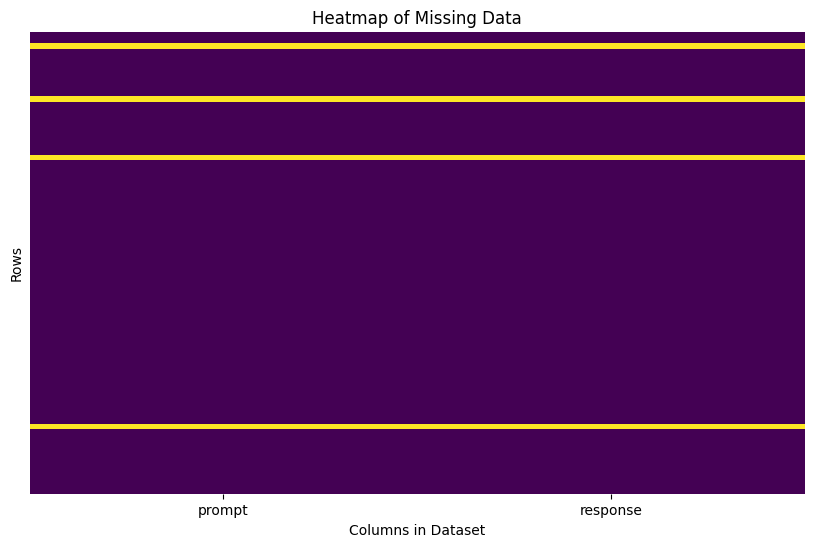

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/ADVAI/codebasics_faqs.csv'  # Replace with your file path
faq_data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Check for missing values
print("Missing values per column:")
print(faq_data.isnull().sum())

# Set up the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(faq_data.isnull(), cbar=False, cmap="viridis", yticklabels=False)

# Add labels and title
plt.title("Heatmap of Missing Data")
plt.xlabel("Columns in Dataset")
plt.ylabel("Rows")

# Show the heatmap
plt.show()


In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import nltk

# Ensure NLTK data is available
nltk.download('punkt')

# Example test set
test_queries = ["How do I reset my password?", "How to update my profile?"]
expected_answers = ["You can reset your password by clicking on 'Forgot Password'.",
                    "To update your profile, go to settings."]

# Iterate through test queries
for i, test_query in enumerate(test_queries):
    # Generate query embedding
    query_embedding = embedding_model.encode([test_query], convert_to_tensor=False)

    # Search for closest match
    D, I = faiss_index.search(query_embedding, k=1)
    best_match_index = I[0][0]
    predicted_answer = answers[best_match_index]

    # Calculate BLEU score
    reference = nltk.word_tokenize(expected_answers[i].lower())
    candidate = nltk.word_tokenize(predicted_answer.lower())
    smoothie = SmoothingFunction().method4  # Smoothing for short sentences
    bleu_score = sentence_bleu([reference], candidate, smoothing_function=smoothie)

    # Print results
    print(f"Query: {test_query}")
    print(f"Expected Answer: {expected_answers[i]}")
    print(f"Predicted Answer: {predicted_answer}")
    print(f"BLEU Score: {bleu_score:.2f}")
    print("-" * 50)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
!pip install pyngrok


In [ ]:
!ngrok authtoken "2pziPMn14E7ha6lY7IsPxyMeb8a_4pLK68PZpdXzkJ1CdNtoY"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Start ngrok with explicit port configuration
public_url = ngrok.connect(8051)
print("Streamlit app is running. Access it via:", public_url)

# Run the Streamlit app
!streamlit run app.py &>/dev/null &


Streamlit app is running. Access it via: NgrokTunnel: "https://3703-34-13-159-30.ngrok-free.app" -> "http://localhost:8051"


In [ ]:
from pyngrok import ngrok
import subprocess

# Start ngrok with explicit port configuration
public_url = ngrok.connect(8051)
print("Streamlit app is running. Access it via:", public_url)

# Run the Streamlit app
subprocess.Popen(["streamlit", "run", "app.py", "--server.port=8051"])


Streamlit app is running. Access it via: NgrokTunnel: "https://cf75-34-13-159-30.ngrok-free.app" -> "http://localhost:8051"


<Popen: returncode: None args: ['streamlit', 'run', 'app.py', '--server.port...>